In [1]:
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
#loading data

fminst = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = fminst.load_data()

### Normalize the data

In [3]:
train_images = X_train/255
test_images = y_test/255

In [4]:
print(X_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000,)


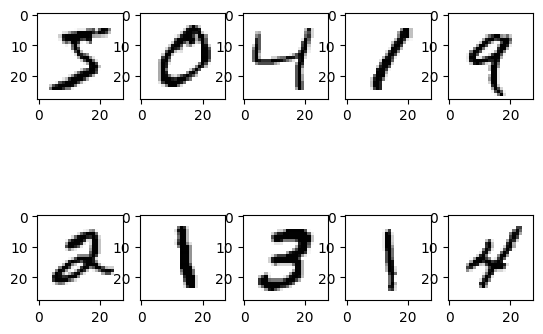

In [5]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    

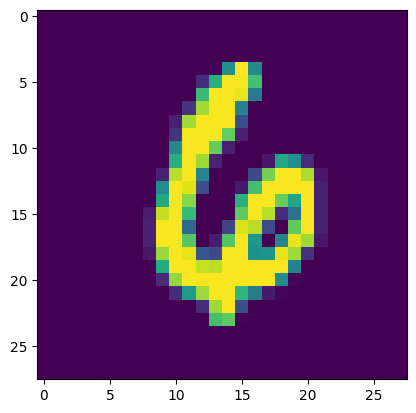

In [13]:

np.set_printoptions(linewidth=320)
plt.imshow(X_train[39])

In [32]:
#creating model

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #input_shape=(28, 28, 1) is the shape of the image
        tf.keras.layers.MaxPooling2D(2,2), #pooling layer
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #convolutional layer
        tf.keras.layers.MaxPooling2D(2,2), #pooling layer
        tf.keras.layers.Flatten(), #flatten layer
        tf.keras.layers.Dense(10, activation='softmax')  #output layer
    ]
)

c:\Users\AI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
#compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,verbose=1),



In [34]:
#running the model
hs = model.fit(X_train,y_train, epochs=10,validation_split=0.2,callbacks=callback)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.8736 - loss: 1.5129 - val_accuracy: 0.9663 - val_loss: 0.1167
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9752 - loss: 0.0816 - val_accuracy: 0.9771 - val_loss: 0.0798
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9824 - loss: 0.0540 - val_accuracy: 0.9822 - val_loss: 0.0663
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9851 - loss: 0.0479 - val_accuracy: 0.9741 - val_loss: 0.0874
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9873 - loss: 0.0440 - val_accuracy: 0.9792 - val_loss: 0.0739
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.9899 - loss: 0.0345 - val_accuracy: 0.9843 - val_loss: 0.0616
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9905 - loss: 0.0309 - val_accuracy: 0.9851 - val_loss: 0.0555
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9922 -

In [35]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9856 - loss: 0.0654


[0.06544611603021622, 0.9855999946594238]

In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


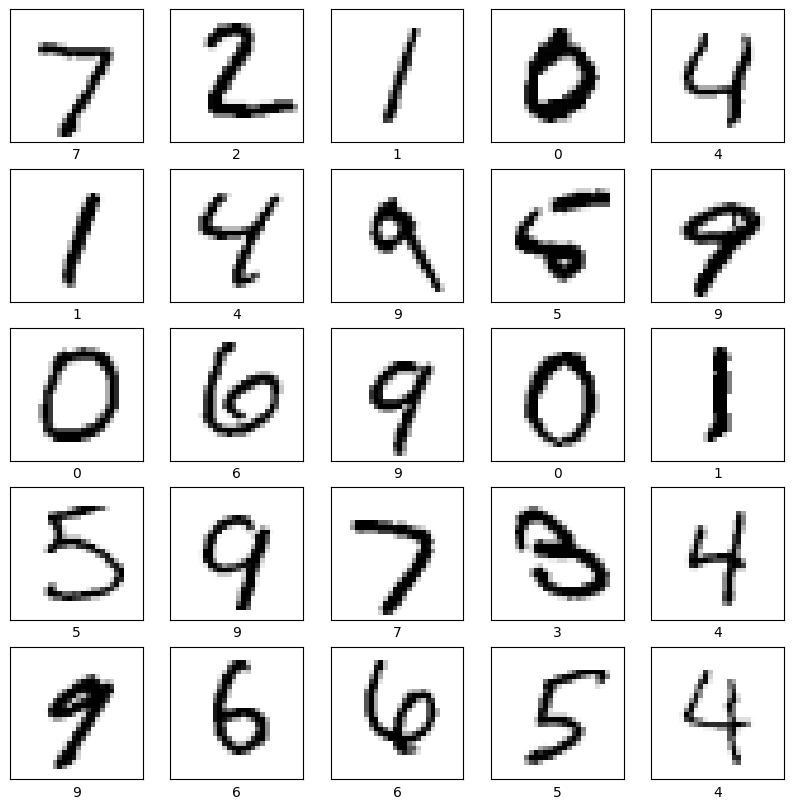

In [45]:


# Display the first 25 test images and their predicted labels

predictions = model.predict(X_test)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()


In [27]:
# saving model

model.save('mnist.h5')

